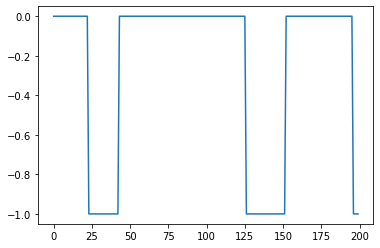

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# #there are 2**2N squares of size 2**-N x 2**-N
# def mixing_scale(x_data, y_data, kappa):
#     array_Size = x_data.shape[0];
#     array_Size = array_Size/2;
#     N = 1;
#     while(True):
#         mesh_size = 1/(2**N);
#         x = 0;
#         for i in range(2**N):
#             y = 0;
#             for k in range(2**N):
#                 function_Values = 0
                
#                 #this needs to change to fit data format
#                 x_matches = np.where(np.logical_and(x_data>=x, x_data<(x+mesh_size)));
#                 x_array = x_matches[0];
#                 #print(x, x+mesh_size);
                
                
#                 y_matches = np.where(np.logical_and(y_data>=y, y_data<(y+mesh_size)));
#                 y_array = y_matches[0];
#                 #print(y, y+mesh_size);
                
#                 matches = set(x_array) & set(y_array);
#                 numPoints = len(matches);
#                 #print(matches)
                
#                 if numPoints == 0:
#                     #print("Empty cell");
#                     break;
                
#                 for points in matches:
#                     #print(points.shape);
#                     if(points <= array_Size):
#                         function_Values += 1;
#                     else:
#                         function_Values -= 1;
        
#                 if abs(function_Values/numPoints) > 1/kappa:
#                     return 1/(2**(N-1));
                
#                 y += mesh_size;     
                
#             x += mesh_size;
            
#         N = N+1;
#         #print(f"The iteration is {N}.");

def mixing_scale(grid, t, kappa):

    # Size of grid (e.g. if grid is 64-by-64 then N=64)
    N = grid[0,0,:,:].shape[0]

    # Resolution of grid (e.g. if grid is 64-by-64 then R=log_2(64)=6 since 64=2**6)
    R = np.log2(N)

    # Print warning if grid size is not a power of 2
    if R.is_integer() == False:
        print('Warning: Grid size should be a power of 2.')

    # x and y coordinates from left half of grid (points corresponding to +1)
    X_left = grid[t, 0, :int(N/2), :]
    Y_left = grid[t, 1, :int(N/2), :]

    # x and y coordinates from right half of grid (points corresponding to -1)
    X_right = grid[t, 0, int(N/2):, :]
    Y_right = grid[t, 1, int(N/2):, :]

    # Flatten to make into 2d histogram
    X_left = X_left.flatten()
    Y_left = Y_left.flatten()
    X_right = X_right.flatten()
    Y_right = Y_right.flatten()

    n = 0
    Mixed = True
    while(n <= R and Mixed == True):

        '''
        Normalizing factor, i.e. number of points per square. The variable Z is
        commonly used for normalizing factors in probability/statistical mechanics.
        '''
        Z = 2**(2*(R-n))

        '''
        2d histogram of points that start in left and right of grid. Ignore xedges and
        yedges, the important objects are Left and Right.
        '''
        Left, xedges, yedges = np.histogram2d(X_left, Y_left, bins=int(2**n), range=[[0,1], [0,1]])
        Right, xedges, yedges = np.histogram2d(X_right, Y_right, bins=int(2**n), range=[[0,1], [0,1]])

        # Check if mixed to scale 2**(-n)
        A = Left-Right
        a = np.max(np.abs((1/Z)*A))
        if a <= 1/kappa:
            scale = 2**(-n)
            #print('Mixed to scale', 2**(-n))
        else:
            Mixed = False

        n += 1

    return scale

grid = np.load("/Users/danielblock/Desktop/Duke/Sophomore Year/RTG/REU_Model_run_200x512x512.npy")
kappa = 3

Scale = np.empty(200)
for t in range(200):
    Scale[t] = mixing_scale(grid, t, kappa)

plt.plot(np.log2(Scale))
plt.show()

In [ ]:
#scale 1 means all sqaures w/ sl 1 are mixed, there exists at least square w/ sl 1/2 that is not mixed
#scale 0.5 means all squares w/ sl 1/2 are mixed, there exists at least 1 square w/ sl 1/4 that is not mixed
#to be mixed, a <= 1/kappa